# Imports

In [1]:
import numpy as np
import xarray as xr
import h5py
from os.path import join

import sys
sys.path.append('./FERMI_2020-07/')

import matplotlib.pyplot as plt
import process_FERMI as pf

from importlib import reload

In [2]:
# execute after modifying library
pf = reload(pf)

In [3]:
# if you are using jupyter notebook, use %matplotlib NOTEBOOK
# if you are using jupyter lab, use %matplotlib WIDGET
%matplotlib notebook

# load non-image data

Change the basefolder according to your file structure

In [4]:
basefolder = './testdata/F6_Scan2/'

exp = pf.get_exp_dataframe(basefolder)
for k in ['xgm_UH', 'xgm_SH']:
    exp[k + '_mean'] = exp[k].apply(np.mean)


Let's have a look at it

In [5]:
exp

,filename,xgm_UH,xgm_SH,filter_seed,wavelength,diode_I0,polarization,harmonic,delay,alignz,samplez,valve_pos2,valve_dpi3,comment,xgm_UH_mean,xgm_SH_mean
0,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[34.768546953656596, 32.586962450105425, 31.69...","[4.415269224605226, 4.039699364336146, 3.99352...",Al-200,20.8,"[156.4833641052246, 139.5864486694336, 141.465...",3.0,12.0,140.40,53.499987,-0.000538,3,3,"1. 81 of 141. Delay 140.400 mm - IR 123uJ, UV ...",31.809653,4.003671
1,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[25.826411469248185, 32.608590250947486, 26.45...","[3.4003757964183143, 4.208357131909752, 3.5122...",Al-200,20.8,"[113.87243270874023, 144.3068504333496, 130.25...",3.0,12.0,140.65,53.499987,-0.000547,3,3,"1. 106 of 141. Delay 140.650 mm - IR 123uJ, UV...",32.872618,4.252859
2,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[30.85408722228265, 33.16526636386783, 34.0412...","[5.4660667761956345, 5.8927551695263, 6.030673...",Al-200,20.8,"[140.77177047729492, 150.6093978881836, 153.87...",3.0,12.0,140.60,53.499987,-0.000545,3,3,"1. 101 of 141. Delay 140.600 mm - IR 123uJ, UV...",32.512074,5.743397
3,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[30.95638718519161, 32.50445407746437, 31.2103...","[3.8436630275913024, 4.1494618671947, 3.972918...",Al-200,20.8,"[131.7601203918457, 145.71218490600586, 144.65...",3.0,12.0,139.66,53.499987,-0.000532,3,3,"1. 7 of 141. Delay 139.660 mm - IR 123uJ, UV 8...",30.524686,3.905606
4,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[29.966137563633534, 30.204450161646257, 25.49...","[3.8885683775791007, 3.9133716268218426, 3.259...",Al-200,20.8,"[145.5611228942871, 147.53637313842773, 111.09...",3.0,12.0,139.64,53.499987,-0.000537,3,3,"1. 5 of 141. Delay 139.640 mm - IR 123uJ, UV 8...",29.812716,3.823439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[31.79138169210857, 33.88244910597753, 32.9443...","[4.01073639713406, 4.3177925368663574, 4.15058...",Al-200,20.8,"[152.08568572998047, 165.21062850952148, 155.3...",3.0,12.0,139.80,53.499987,-0.000537,3,3,"1. 21 of 141. Delay 139.800 mm - IR 123uJ, UV ...",31.396603,3.923168
218,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[36.64022065749171, 28.555536847220836, 32.810...","[4.558178695037302, 3.5004117510388952, 4.0927...",Al-200,20.8,"[167.3389434814453, 116.76464080810547, 151.76...",3.0,12.0,139.81,53.499987,-0.000534,3,3,"1. 22 of 141. Delay 139.810 mm - IR 123uJ, UV ...",30.113444,3.620559
219,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[37.50901851803849, 33.77099683662453, 36.6113...","[4.624781533223657, 4.175066783039124, 4.49801...",Al-200,20.8,"[173.61717224121094, 152.22301483154297, 170.3...",3.0,12.0,139.74,53.499987,-0.000536,3,3,"1. 15 of 141. Delay 139.740 mm - IR 123uJ, UV ...",32.617005,4.058926
220,/home/gehrlinger/Documents/Beamtimes/2020-06_F...,"[35.04252248576058, 33.24245577878177, 33.2666...","[4.327588550799312, 4.111552379681715, 4.16023...",Al-200,20.8,"[160.22043228149414, 147.06802368164062, 161.4...",3.0,12.0,140.24,53.499987,-0.000540,3,3,"1. 65 of 141. Delay 140.240 mm - IR 123uJ, UV ...",32.090043,3.997034


## filter entries

In [6]:
# ...

# Plot single image

Load an image and it's meta data. This will be used to setup the azimuthal integrator. All following images do not need to be loaded and plotted for the functionning of this script.

<IPython.core.display.Javascript object>


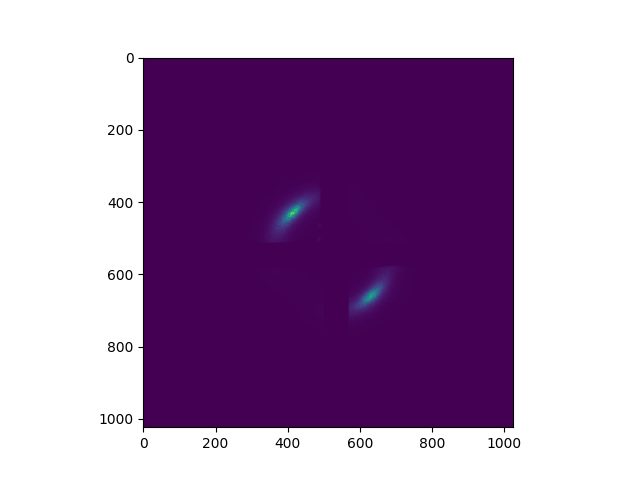

In [7]:
im, meta = pf.loadh5(exp.loc[12, 'filename'], extra_keys=[pf.mnemonics['alignz']])

fig, ax = plt.subplots()
ax.imshow(im)

# Set up the azimuthal integration
This has to be done only once (unless the image center shifts, or the image shape changes).
Reusing the AzimuthalIntegrator instance is very fast.

You need to specifiy the center (determine it via the plotted image above). The rest is filled in automatically from the image shape and image meta data. 

In [8]:
ai = pf.AzimuthalIntegrator(im.shape, dist = meta['DPI/AlignZ'] * 1e-3, center = (549, 527),
                            polar_range = (0, 179), nint = 100)

norm = ai(np.ones_like(im))

# Process delay scan
set up empty DataArray using xarray

In [17]:
scan = xr.DataArray(
    np.zeros([len(exp), len(ai.distance)]),
    dims=['delay', 'r'],
    coords={'r': ai.distance, 'delay': np.sort(exp.delay)}
)

test it on our single image

<IPython.core.display.Javascript object>


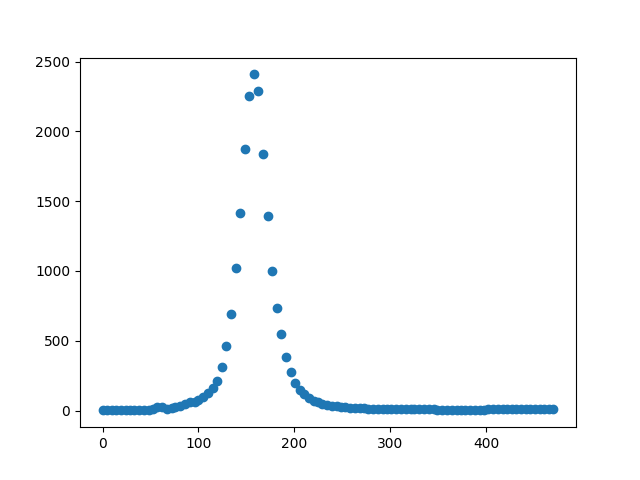

In [18]:
fig, ax = plt.subplots()
ax.plot(ai.distance, ai(im) / norm, 'o')

## load dark

I'm just loading a static single dark here.

Remember to change the path according to your file structure.

In [19]:
dark = pf.loadh5('./testdata/F6_Scan2_BG/rawdata/F6_Scan2_BG_163566569.h5')[0]
dark = dark.astype(float)

## crunch

Do the azimuthal integration for all images in the delay scan.

In [20]:
for index, r in exp.iterrows():
    im, meta = pf.loadh5(r['filename'])
    im = im - dark
    scan.loc[{'delay': r['delay']}] = ai(im) / norm / r['xgm_SH_mean']


## plot

<IPython.core.display.Javascript object>


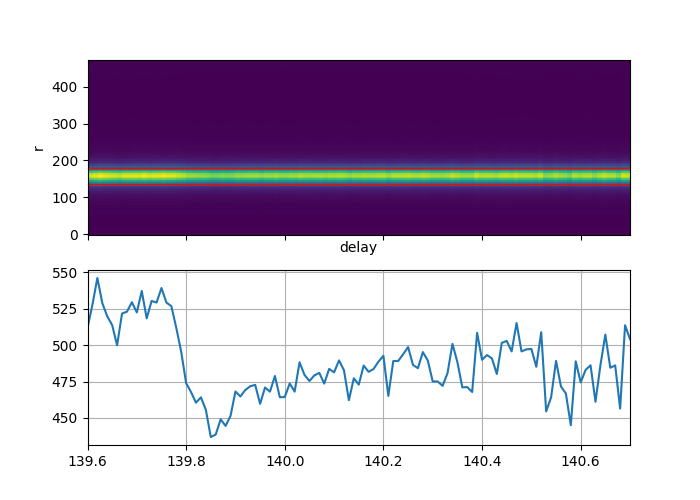

In [22]:
rmin, rmax = 135, 180

demag = scan.where((scan.r > rmin) & (scan.r < rmax)).mean('r')

fig, [ax1, ax2] = plt.subplots(nrows=2, figsize=(7, 5), sharex=True)
scan.plot.imshow(x='delay', y='r', ax=ax1, vmin=0, cmap='viridis', add_colorbar=False)
ax2.plot(demag.delay, demag)
ax2.grid()

for r in [rmin, rmax]:
    ax1.axhline(r, c='r', lw=1)